# 생태통로가 속하는 도로에 해당하는 제한속도 값 넣어주기

[도로 제한속도](https://namu.wiki/w/%EC%86%8D%EB%8F%84%EC%9C%84%EB%B0%98) => MainData의 도로명 컬럼을 기반으로 도로마다의 제한속도 추출
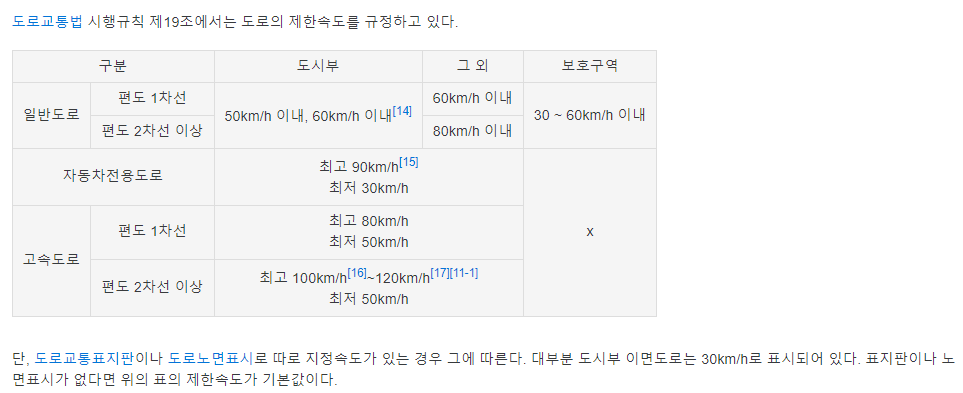

## 패키지

In [273]:
!pip install pymysql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [274]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import pymysql

## 데이터 로드

In [275]:
endpoint = 'dao.cdqd2bwz9q4s.ap-northeast-2.rds.amazonaws.com'
schema_name = 'dao'
db_connection_str = 'mysql+pymysql://admin:ekfkawnl@{}/{}'.format(endpoint, schema_name )
try :
    db_connection = create_engine(db_connection_str)
    conn = db_connection.connect()
except :
    print('fail to connect db')

In [276]:
def sql_to_df(table_name):
    sql = "SELECT * FROM {}".format(table_name)
    df = pd.read_sql(sql, db_connection)
    return df

In [277]:
main = sql_to_df("MainData")
ecopath_list = sql_to_df("생태통로_목록_0808")

In [278]:
main

,번호,위도,경도,생태통로_유형,차선_수,등산객_이용빈도,생태통로_효율성,이용확인종,이용확인종_수,폭(m),연장(m),높이(m),개방도
0,1495,35.36019,128.06375,0,1,1,3,None,0,NaN,NaN,NaN,NaN
1,1277,37.03408,128.40661,1,0,0,3,None,0,NaN,NaN,NaN,NaN
2,1278,36.89832,128.30563,1,0,0,1,고라니 멧돼지 파충류,3,NaN,NaN,NaN,NaN
3,1279,36.89687,128.30581,1,0,0,1,고라니 멧돼지 파충류,3,NaN,NaN,NaN,NaN
4,1090,36.71336,127.42200,0,2,5,1,개 고양이 다람쥐,3,8.23,38.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,1089,36.71278,127.42056,0,2,0,0,고라니 멧돼지,2,13.30,50.7,NaN,NaN
493,1087,36.71722,127.41778,0,1,5,0,고라니 멧돼지,2,13.60,38.7,NaN,NaN
494,1088,36.71222,127.42528,0,1,5,0,고라니 멧돼지,2,13.30,50.7,NaN,NaN
495,1091,36.76750,127.47333,0,0,0,0,멧돼지 고라니,2,7.00,20.0,NaN,NaN


In [279]:
ecopath_list

,번호,생태통로명,주소,도로명,도로번호,차선_수,위도_도,위도_분,위도_초,경도_도,경도_분,경도_초,위도_도분초,경도_도분초,위도_십진법,경도_십진법
0,1001,중동터널,서울특별시 구로구 궁동,계남큰길,None,왕복6차로,37,30.0,23.37000,126,49.0,51.56000,37 30 23.37,126 49 51.56,37.50649,126.83099
1,1002,개좌생태터널,부산광역시 금정구 회동동 산4-1,개좌로,0,왕복2차선,35,15.0,6.05000,129,8.0,27.31000,35 15 6.05,129 8 27.31,35.25168,129.14092
2,1004,곰내 생태통로,부산광역시 기장군 철마면 웅천리,군도,19호선,왕복2차선,35,18.0,20.80000,129,10.0,19.20000,35 18 20.8,129 10 19.2,35.30578,129.17200
3,1005,정관예림리 생태통로,부산광역시 기장군 정관면 예림리,국지도,60호,왕복4차선,35,19.0,46.80000,129,12.0,11.90000,35 19 46.8,129 12 11.9,35.32967,129.20331
4,1006,을숙도 생태통로,부산광역시 사하구 하단동,낙동남로,1240,왕복7차선,35,6.0,31.84632,128,56.0,28.46904,35 6 31.8463200000076,128 56 28.469039999984,35.10885,128.94124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,1564,삼척노곡,강원도 삼척시 원덕읍 노곡리 산146-3,국도,7호선,왕복4차선,37,12.0,33.19000,129,20.0,14.09000,37 12 33.19,129 20 14.09,37.20922,129.33725
532,1565,절토육교,경기도 의왕시 월암동 산46-3,서수원~의왕간 도로,지방도 309호선,왕복6차선,37,19.0,2.04000,126,57.0,59.00000,37 19 2.04,126 57 59.0,37.31723,126.96639
533,1566,동물이동통로,경기도 의왕시 고천동 산55-5,서수원~의왕간 도로,지방도309호선,왕복6차선,37,20.0,11.80000,126,58.0,23.42000,37 20 11.8,126 58 23.42,37.33661,126.97317
534,1567,None,경기도 영중면 거사리 산3-22번지 일원,중로,3-30,왕복2차선,37,59.0,30.60000,127,13.0,43.23000,37 59 30.6,127 13 43.23,37.99183,127.22868


In [280]:
ecopath_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   번호      536 non-null    int64  
 1   생태통로명   410 non-null    object 
 2   주소      536 non-null    object 
 3   도로명     527 non-null    object 
 4   도로번호    515 non-null    object 
 5   차선_수    536 non-null    object 
 6   위도_도    536 non-null    int64  
 7   위도_분    536 non-null    float64
 8   위도_초    536 non-null    float64
 9   경도_도    536 non-null    int64  
 10  경도_분    536 non-null    float64
 11  경도_초    536 non-null    float64
 12  위도_도분초  536 non-null    object 
 13  경도_도분초  536 non-null    object 
 14  위도_십진법  536 non-null    float64
 15  경도_십진법  536 non-null    float64
dtypes: float64(6), int64(3), object(7)
memory usage: 67.1+ KB


In [281]:
ecopath_list['도로명'].unique()

array(['계남큰길', '개좌로', '군도', '국지도', '낙동남로', '만덕고갯길', '경명로', '원적로',
       '동부순환도로', '대전남부순환고속도로', '국도', '보삼길', '시도', '-', '마을진입로', '농어촌',
       None, '돌마로', '학고개터널', '도시계획도로소', '원설로', '소로1-11', '시청로', '학령로',
       '지방도', '하면~일동', '하능마을로', '금하로', '밤일로', '서수원∼의왕간고속화도로', '1순환로',
       '사담선', '농어촌도로', '군현∼연정', '면도', '서원구', '구룡산로', '안뜸로', '소로2-5',
       '오창공원로', '과학산업2로', '리도', '태조산', '지방산업단지진입도로', '대(보)', '중(집)', '대로',
       '금성', '공단', '농어촌도', '후광대로', '신월로', '남해고속도로', '산동고달간', '산동-고달간',
       '무안광주고속도로', '중로', '행암로', '현동로', '1002호선', '군도6호', '농어촌101호선',
       '516도로', '국도대체우회도로', '평화로', '1100도로', '516로', '남부대로', '일반국도',
       '무안광주선', '평택제천선', '중부내륙선', '동해선', '영동선', '중앙선', '서울양양선', '청주상주선',
       '당진대전선', '서해안선', '익산장수선', '중부선', '대구포항선', '호남선', '순천완주선', '영암순천선',
       '서천공주선', '남해선', '충무로72번길', '위임국도', '도시계획도로', '은봉로', '논고개로', '고속국도',
       '논현로', '앵고개로', '상원사진입도로', '다산산단로', '현문로', '부산포항선', '광주대구선 125.8k',
       '산115', '광주대구선', '국도 ', '지방도 ', '매봉로', '천성대항길',
       '예천군 호명면 종산

=> 모든 도로에 대해 제한속도를 지정해 줄 필요 X. MainData에 있는 생태통로의 도로들만 뽑아서 제한속도 지정하면 됨

## MainData에 있는 생태통로의 도로 정보만 뽑아내기

In [282]:
# 번호를 key로 하여 main을 기준으로 left join
main2 = pd.merge(main, ecopath_list[['번호', '도로명', '도로번호', '차선_수']], how='left', on='번호')
main2

,번호,위도,경도,생태통로_유형,차선_수_x,등산객_이용빈도,생태통로_효율성,이용확인종,이용확인종_수,폭(m),연장(m),높이(m),개방도,도로명,도로번호,차선_수_y
0,1495,35.36019,128.06375,0,1,1,3,None,0,NaN,NaN,NaN,NaN,일반국도,20호선,왕복4차선
1,1277,37.03408,128.40661,1,0,0,3,None,0,NaN,NaN,NaN,NaN,국도,59호선,왕복2차선
2,1278,36.89832,128.30563,1,0,0,1,고라니 멧돼지 파충류,3,NaN,NaN,NaN,NaN,국도,59호선,왕복2차선
3,1279,36.89687,128.30581,1,0,0,1,고라니 멧돼지 파충류,3,NaN,NaN,NaN,NaN,국도,59호선,왕복2차선
4,1090,36.71336,127.42200,0,2,5,1,개 고양이 다람쥐,3,8.23,38.0,NaN,NaN,지방도,540호,왕복6차선
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,1089,36.71278,127.42056,0,2,0,0,고라니 멧돼지,2,13.30,50.7,NaN,NaN,과학산업2로,구룡리 472도,왕복6차선
493,1087,36.71722,127.41778,0,1,5,0,고라니 멧돼지,2,13.60,38.7,NaN,NaN,오창공원로,구룡리 442도,왕복4차선
494,1088,36.71222,127.42528,0,1,5,0,고라니 멧돼지,2,13.30,50.7,NaN,NaN,오창공원로,양청리 882도(호수공원 주변),왕복4차선
495,1091,36.76750,127.47333,0,0,0,0,멧돼지 고라니,2,7.00,20.0,NaN,NaN,리도,213호선,왕복2차선


In [283]:
print(main2['도로명'].isna().sum())
print(main2['도로번호'].isna().sum())
print(main2['차선_수_y'].isna().sum())

9
21
0


In [284]:
main2[main2['도로명'].isna()] # 도로명 결측치

,번호,위도,경도,생태통로_유형,차선_수_x,등산객_이용빈도,생태통로_효율성,이용확인종,이용확인종_수,폭(m),연장(m),높이(m),개방도,도로명,도로번호,차선_수_y
5,1023,37.41972,127.18750,0,0,1,2,고라니 너구리 멧돼지 다람쥐,4,25.1,13.0,NaN,NaN,None,389,왕복2차선
45,1064,37.28275,127.06903,0,0,5,0,None,0,40.0,30.0,NaN,NaN,None,None,하천횡단
78,1093,36.81056,127.11495,0,1,0,0,None,0,5.5,54.6,NaN,NaN,None,None,왕복4차선
80,1155,35.23671,128.65533,0,1,5,3,None,0,98.0,24.7,NaN,NaN,None,300호선,왕복4차선
104,1156,35.19031,128.62275,0,2,5,3,None,0,5.9,44.3,NaN,NaN,None,299호선,왕복6차선
163,1065,37.28208,127.07153,0,3,5,1,None,0,45.0,40.0,NaN,NaN,None,None,왕복8차선
218,1157,35.16861,128.69972,0,0,5,3,None,0,5.8,10.0,NaN,NaN,None,299호선,왕복2차선
304,1095,36.79311,127.13439,0,1,2,2,None,0,10.0,29.5,NaN,NaN,None,None,왕복4차선
305,1094,36.80673,127.11350,0,1,2,0,None,0,5.0,86.0,NaN,NaN,None,None,왕복4차선


In [285]:
# main2['도로명'].unique()

In [286]:
# main2['도로번호'].unique()

## 고속국도 (고속도로) 
[한국도로공사 - 고속도로 제한최고속도](https://www.ex.co.kr/site/com/pageProcess.do)

### 도로번호에 '고속'을 포함한 경우

In [287]:
highway = []
for i, m_row in main2.iterrows():
  if m_row['도로번호'] == None: continue
  if '고속' in m_row['도로번호']:
    highway.append(i)

In [288]:
print(len(highway))
print(highway)

58
[53, 54, 55, 56, 57, 66, 67, 68, 69, 74, 75, 76, 77, 101, 102, 117, 119, 121, 123, 144, 175, 179, 180, 199, 227, 228, 230, 232, 278, 279, 306, 307, 308, 309, 310, 311, 312, 313, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 349, 350, 351, 352, 353, 354, 355, 356, 374]


In [289]:
# main2.iloc[highway]

In [290]:
main2.iloc[highway][['도로명', '도로번호']]

,도로명,도로번호
53,남해선,(고속국도 10호선)
54,남해선,(고속국도 10호선)
55,남해선,(고속국도 10호선)
56,남해선,(고속국도 10호선)
57,남해선,(고속국도 10호선)
66,당진대전선,(고속국도 30호선)
67,당진대전선,(고속국도 30호선)
68,당진대전선,(고속국도 30호선)
69,당진대전선,(고속국도 30호선)
74,대구포항선,(고속국도 20호선)


In [291]:
main2.loc[main2['도로명'] == '남해선', '최고제한속도(km/h)'] = 100

In [292]:
main2.loc[main2['도로명'] == '당진대전선', '최고제한속도(km/h)'] = 110

In [293]:
main2.loc[main2['도로명'] == '대구포항선', '최고제한속도(km/h)'] = 100

In [294]:
main2.loc[main2['도로명'] == '동해선', '최고제한속도(km/h)'] = 100 # 따로 명시돼 있는 부산포항선이 아닌 동해선은 삼척속초선 뿐이므로 이에 따름

In [295]:
main2.loc[main2['도로명'] == '무안광주선', '최고제한속도(km/h)'] = 100

In [296]:
main2.loc[main2['도로명'] == '부산포항선', '최고제한속도(km/h)'] = 100 # 구간별로 달라 더 긴 구간의 제한 속도를 따름

In [297]:
main2.loc[main2['도로명'] == '서울양양선', '최고제한속도(km/h)'] = 100 # 특정 구간은 80이지만, 모두 차선 수가 편도 2차선 이상이므로 모두 100으로 저장

In [298]:
main2.loc[main2['도로명'] == '서천공주선', '최고제한속도(km/h)'] = 110 # 차선 수가 편도 2차선 이상이고, 가장 긴 구간의 제한속도가 110이므로 110으로 저장

In [299]:
main2.loc[main2['도로명'] == '서해안선', '최고제한속도(km/h)'] = 110 # 구간별로 달라 서해안선 중 가장 긴 구간의 제한 속도를 따름

In [300]:
main2.loc[main2['도로명'] == '순천완주선', '최고제한속도(km/h)'] = 100

In [301]:
main2.loc[main2['도로명'] == '영동선', '최고제한속도(km/h)'] = 100

In [302]:
main2.loc[main2['도로명'] == '영암순천선', '최고제한속도(km/h)'] = 100

In [303]:
main2.loc[main2['도로명'] == '익산장수선', '최고제한속도(km/h)'] = 100

In [304]:
main2.loc[main2['도로명'] == '중부내륙선', '최고제한속도(km/h)'] = 110 # 구간별로 달라 가장 긴 구간의 제한 속도를 따름

In [305]:
main2.loc[main2['도로명'] == '중부선', '최고제한속도(km/h)'] = 100 # 구간별로 달라 가장 긴 구간의 제한 속도를 따름

In [306]:
main2.loc[main2['도로명'] == '중앙선', '최고제한속도(km/h)'] = 100 # 구간별로 달라 가장 긴 구간의 제한 속도를 따름

In [307]:
main2.loc[main2['도로명'] == '청주상주선', '최고제한속도(km/h)'] = 110

In [308]:
main2.loc[main2['도로명'] == '평택제천선', '최고제한속도(km/h)'] = 100

In [309]:
main2.loc[main2['도로명'] == '호남선', '최고제한속도(km/h)'] = 100

In [310]:
# main2[main2['도로명'] == '호남선'] # 확인용

In [311]:
main2.iloc[highway]['최고제한속도(km/h)'].isna().sum()

0

=> 결측치 없으므로 완료 !

### 도로명에 '고속'을 포함한 경우

In [312]:
highway2 = []
for i, m_row in main2.iterrows():
  if m_row['도로명'] == None: continue
  if '고속' in m_row['도로명']:
    highway2.append(i)

In [313]:
highway2

[97, 116, 233, 292, 383, 385, 435, 437, 441, 456]

In [314]:
main2.iloc[highway2]

,번호,위도,경도,생태통로_유형,차선_수_x,등산객_이용빈도,생태통로_효율성,이용확인종,이용확인종_수,폭(m),연장(m),높이(m),개방도,도로명,도로번호,차선_수_y,최고제한속도(km/h)
97,1516,37.33661,126.97317,0,2,1,0,고양이 고라니,2,64.0,40.6,NaN,NaN,서수원∼의왕간고속화도로 지방도,309호선,왕복6~8차선,NaN
116,1138,35.06678,126.58747,1,1,0,0,None,0,NaN,NaN,NaN,NaN,무안광주고속도로,12호선,왕복4차선,NaN
233,1440,34.80761,127.15794,0,1,0,2,너구리 삵,2,NaN,NaN,NaN,NaN,고속국도,10호선,왕복4차선,NaN
292,1517,37.31723,126.96639,0,2,5,0,고양이 고라니,2,14.5,41.5,NaN,NaN,서수원∼의왕간고속화도로 지방도,309호선,왕복6~8차선,NaN
383,1547,37.78822,128.12467,0,1,0,3,None,0,48.0,68.0,NaN,NaN,고속도로,60,왕복4차선,NaN
385,1546,37.75767,128.01514,0,1,0,3,None,0,26.8,47.0,NaN,NaN,고속도로,60,왕복4차선,NaN
435,1013,36.28339,127.38732,0,1,5,3,None,0,95.3,56.7,NaN,NaN,대전남부순환고속도로,남부순환도로,왕복4차선,NaN
437,1559,35.68328,129.18131,0,1,0,3,None,0,NaN,NaN,NaN,NaN,고속,1,왕복4차선,NaN
441,1133,34.98639,127.58556,0,1,4,2,고라니 너구리 삵 멧돼지,4,11.4,45.7,NaN,NaN,남해고속도로,None,왕복4차선,NaN
456,1554,35.47802,127.54584,1,1,0,3,None,0,NaN,NaN,NaN,NaN,고속,12,왕복4차선,NaN


In [315]:
main2.iloc[highway2].index

Int64Index([97, 116, 233, 292, 383, 385, 435, 437, 441, 456], dtype='int64')

In [316]:
main2.loc[[97, 292], '최고제한속도(km/h)'] = 60 # 지방도에 속함 (https://namu.wiki/w/309%EB%B2%88%20%EC%A7%80%EB%B0%A9%EB%8F%84)
# 편도 2차선 이상인 일반도로이고 여러 정보를 취합한 결과 60이 무난해 보임.

In [317]:
# 고속국도 10번, 12번은 모두 최고제한속도가 100
main2.loc[[116, 233, 456], '최고제한속도(km/h)'] = 100

In [318]:
main2.loc[[383, 385], '최고제한속도(km/h)'] = 100 # 일부 구간은 80이나, 대부분의 구간이 100이므로 100으로 저장

In [319]:
main2.loc[435, '최고제한속도(km/h)'] = 100 # 고속국도 300번 대전남부순환선의 최고제한속도는 100

In [320]:
main2.loc[437, '최고제한속도(km/h)'] = 100 # 가장 긴 구간의 제한속도를 따름

In [321]:
main2.loc[441, '최고제한속도(km/h)'] = 100 # 남해선의 가장 긴 구간의 제한속도를 따름

In [322]:
# main2.loc[441] # 확인용

In [323]:
main2.iloc[highway2]['최고제한속도(km/h)'].isna().sum()

0

=> 결측치 없으므로 완료 !

### 도로명이 고속국도 이름인 것 같은 경우

In [324]:
main2[(main2['도로명'] == '광주대구선 125.8k') | (main2['도로명'] == '광주대구선') | (main2['도로명'] == '동해선') |
      (main2['도로명'] == '무안광주선') | (main2['도로명'] == '서부순환로') | (main2['도로명'] == '서울양양선') |
      (main2['도로명'] == '순천완주선') | (main2['도로명'] == '영암순천선') | (main2['도로명'] ==  '남부순환로') | 
      (main2['도로명'] == '남부대로') | (main2['도로명'] == '동부순환도로') | (main2['도로명'] ==  '군현∼연정')]

,번호,위도,경도,생태통로_유형,차선_수_x,등산객_이용빈도,생태통로_효율성,이용확인종,이용확인종_수,폭(m),연장(m),높이(m),개방도,도로명,도로번호,차선_수_y,최고제한속도(km/h)
28,1460,35.70748,127.96741,1,1,0,3,None,0,NaN,NaN,NaN,NaN,광주대구선 125.8k,12,왕복4차선,NaN
29,1462,35.36617,127.12414,1,1,0,2,None,0,NaN,NaN,NaN,NaN,광주대구선,제12호선,왕복4차선,NaN
30,1466,35.38675,127.24964,1,1,0,3,None,0,NaN,NaN,NaN,NaN,광주대구선,제12호선,왕복4차선,NaN
31,1464,35.42317,127.36178,0,1,0,3,None,0,47.7,34.8,NaN,NaN,광주대구선,제12호선,왕복4차선,NaN
32,1465,35.47836,127.56028,0,1,0,3,None,0,126.6,32.0,NaN,NaN,광주대구선,제12호선,왕복4차선,NaN
33,1467,35.54294,127.69214,1,1,0,3,None,0,NaN,NaN,NaN,NaN,광주대구선,제12호선,왕복4차선,NaN
98,1519,38.12875,128.57922,0,1,0,0,고라니 너구리,2,137.4,53.0,NaN,NaN,동해선,65,왕복4차선,100.0
99,1520,38.15042,128.58506,0,1,0,3,None,0,47.9,34.7,NaN,NaN,동해선,65,왕복4차선,100.0
100,1518,37.50025,129.09139,0,1,0,3,None,0,37.0,45.0,NaN,NaN,동해선,65,왕복4차선,100.0
101,1362,37.68722,128.91671,0,1,0,0,고라니 너구리,2,6.8,40.0,NaN,NaN,동해선,(고속국도 65호선),왕복4차선,100.0


In [325]:
# 광주대구선 고속도로 최고제한속도는 100
main2.loc[28:34, '최고제한속도(km/h)'] = 100

=> 서부순환로, 남부순환로, 남부대로, 동부순환도로, 군현~연정은 모두 일반국도로 아래에서 처리

## 일반국도 (고속도로 이외 도로)
일반국도 : 국도, 지방도, 시도, 구도, 군도 등 \
*[국도](https://namu.wiki/w/%EA%B5%AD%EB%8F%84)는 고속국도와 일반국도로 분류되지만, 고속국도는 보통 고속도로로 칭하고 일반적으로는 일반국도만을 '국도'라고 부른다. 

In [326]:
main2['최고제한속도(km/h)'].isna().sum()

407

In [327]:
general = main2[main2['최고제한속도(km/h)'].isna()] # 고속도로 이외 일반도로
general

,번호,위도,경도,생태통로_유형,차선_수_x,등산객_이용빈도,생태통로_효율성,이용확인종,이용확인종_수,폭(m),연장(m),높이(m),개방도,도로명,도로번호,차선_수_y,최고제한속도(km/h)
0,1495,35.36019,128.06375,0,1,1,3,None,0,NaN,NaN,NaN,NaN,일반국도,20호선,왕복4차선,NaN
1,1277,37.03408,128.40661,1,0,0,3,None,0,NaN,NaN,NaN,NaN,국도,59호선,왕복2차선,NaN
2,1278,36.89832,128.30563,1,0,0,1,고라니 멧돼지 파충류,3,NaN,NaN,NaN,NaN,국도,59호선,왕복2차선,NaN
3,1279,36.89687,128.30581,1,0,0,1,고라니 멧돼지 파충류,3,NaN,NaN,NaN,NaN,국도,59호선,왕복2차선,NaN
4,1090,36.71336,127.42200,0,2,5,1,개 고양이 다람쥐,3,8.23,38.0,NaN,NaN,지방도,540호,왕복6차선,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,1089,36.71278,127.42056,0,2,0,0,고라니 멧돼지,2,13.30,50.7,NaN,NaN,과학산업2로,구룡리 472도,왕복6차선,NaN
493,1087,36.71722,127.41778,0,1,5,0,고라니 멧돼지,2,13.60,38.7,NaN,NaN,오창공원로,구룡리 442도,왕복4차선,NaN
494,1088,36.71222,127.42528,0,1,5,0,고라니 멧돼지,2,13.30,50.7,NaN,NaN,오창공원로,양청리 882도(호수공원 주변),왕복4차선,NaN
495,1091,36.76750,127.47333,0,0,0,0,멧돼지 고라니,2,7.00,20.0,NaN,NaN,리도,213호선,왕복2차선,NaN


In [328]:
general['도로명'].unique()

array(['일반국도', '국도', '지방도', None, '갈매동 산 69-183', '군도', '갈사만진입도로', '국지도',
       '개좌로', '계룡대로', '범안로', '지방도 ', '소로1-11', '충절로', '구항길', '민락로',
       '농어촌도로', '신평화로', '하면~일동', '논현로', '시도', '국도 ', '돌마로', '만덕고갯길',
       '농어촌101호선', '국대도', '금하로', '후광대로', '-', '서부순환로', '아차산로', '현동로',
       '산115', '서원구', '논고개로', '태조산', '신단로', '위임국도', '앵고개로', '부흥로',
       '천성대항길', '대로', '예천군 호명면 종산리 산46-1', '남부순환로', '농어촌', '충무로72번길',
       '신월로', '원적로', '공단', '상원사진입도로', '은봉로', '낙동남로', '하능마을로', '남부대로',
       '동일로', '계남큰길', '지방산업단지진입도로', '경명로', '어하고개로', '북부산업로', '보삼길', '시청로',
       '학령로', '516로', '마을진입로', '현문로', '중로', '학고개터널', '도시계획도로소', '원설로',
       '군도6호', '1002호선', '행암로', '다산산단로', '봉산로', '동부순환도로', '산동-고달간',
       '산동고달간', '농어촌도', '516도로', '평화로', '1100도로', '국도대체우회도로', '금성',
       '대(보)', '소로2-5', '사담선', '군현∼연정', '면도', '매봉로', '구룡산로', '안뜸로',
       '1순환로', '과학산업2로', '오창공원로', '리도'], dtype=object)

### 도로명이 결측치인 경우

In [329]:
general[(general['도로명'] == None) | (general['도로명'] == '-')]

,번호,위도,경도,생태통로_유형,차선_수_x,등산객_이용빈도,생태통로_효율성,이용확인종,이용확인종_수,폭(m),연장(m),높이(m),개방도,도로명,도로번호,차선_수_y,최고제한속도(km/h)
146,1506,37.19361,126.95028,0,1,0,3,None,0,56.8,60.6,NaN,NaN,-,-,왕복4차선,NaN
221,1063,37.29661,127.05875,0,3,5,1,None,0,29.1,329.0,NaN,NaN,-,-,왕복16차선,NaN
236,1018,37.35452,127.16786,0,1,2,0,고라니,1,68.0,64.0,NaN,NaN,-,57호선,왕복4차선,NaN


=> 차선 수에 기반해 아래에서 처리

### 일반국도는 **차선 수**에 기반해 최고제한속도 저장
* 일반도로 (보통의 경우)
  * 편도 1차로 → 60km/h 이내
  * 편도 2차로 이상 → 80km/h 이내

참고 : [도로교통공단 - 법정 속도](https://www.koroad.or.kr/kp_web/knCarSafe1-03.do)

In [330]:
general['차선_수_y'].unique()

array(['왕복4차선', '왕복2차선', '왕복6차선', '왕복8차선', '하천횡단', '왕복 1 차선', '왕복 6 차선',
       '왕복3차선', '왕복5', '왕복5차선', '왕복16차선', '왕복1차선', '왕복6차로', '2차선',
       '왕복7차선', '왕복12차선', '왕복3차선(오르막차로1차로포함)', '1차로', '하부 왕복 6차선'],
      dtype=object)

#### 편도 2차로 미만인 경우

In [331]:
general[(general['차선_수_y'] == '왕복2차선') | (general['차선_수_y'] == '왕복 1 차선') |
        (general['차선_수_y'] == '왕복3차선') | (general['차선_수_y'] == '왕복1차선') | 
        (general['차선_수_y'] == '2차선') | (general['차선_수_y'] == '왕복3차선(오르막차로1차로포함)') |
        (general['차선_수_y'] == '1차로')]

,번호,위도,경도,생태통로_유형,차선_수_x,등산객_이용빈도,생태통로_효율성,이용확인종,이용확인종_수,폭(m),연장(m),높이(m),개방도,도로명,도로번호,차선_수_y,최고제한속도(km/h)
1,1277,37.03408,128.40661,1,0,0,3,None,0,NaN,NaN,NaN,NaN,국도,59호선,왕복2차선,NaN
2,1278,36.89832,128.30563,1,0,0,1,고라니 멧돼지 파충류,3,NaN,NaN,NaN,NaN,국도,59호선,왕복2차선,NaN
3,1279,36.89687,128.30581,1,0,0,1,고라니 멧돼지 파충류,3,NaN,NaN,NaN,NaN,국도,59호선,왕복2차선,NaN
5,1023,37.41972,127.18750,0,0,1,2,고라니 너구리 멧돼지 다람쥐,4,25.1,13.0,NaN,NaN,None,389,왕복2차선,NaN
7,1453,36.40691,129.04714,0,0,0,1,고라니 너구리 멧돼지,3,37.3,12.4,NaN,NaN,군도,금곡2-신흥,왕복2차선,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,1080,36.60484,127.54735,0,0,0,1,고라니 멧돼지,2,8.2,62.5,NaN,NaN,면도,106호선,왕복2차선,NaN
487,1081,36.67299,127.66779,0,0,0,0,고라니 멧돼지,2,29.5,26.5,NaN,NaN,면도,101호선,왕복2차선,NaN
488,1482,36.62409,127.47784,0,0,5,3,None,0,22.6,31.2,NaN,NaN,매봉로,매봉로,왕복2차선,NaN
490,1084,36.61426,127.48109,0,0,4,3,None,0,7.2,23.8,NaN,NaN,안뜸로,47,왕복2차선,NaN


In [332]:
less2_idx = general[(general['차선_수_y'] == '왕복2차선') | (general['차선_수_y'] == '왕복 1 차선') |
                    (general['차선_수_y'] == '왕복3차선') | (general['차선_수_y'] == '왕복1차선') | 
                    (general['차선_수_y'] == '2차선') | (general['차선_수_y'] == '왕복3차선(오르막차로1차로포함)') |
                    (general['차선_수_y'] == '1차로')].index
less2_idx

Int64Index([  1,   2,   3,   5,   7,   9,  10,  12,  13,  14,
            ...
            481, 482, 483, 484, 485, 486, 487, 488, 490, 495],
           dtype='int64', length=224)

In [333]:
main2.loc[less2_idx, '최고제한속도(km/h)'] = 60
main2.loc[less2_idx]

,번호,위도,경도,생태통로_유형,차선_수_x,등산객_이용빈도,생태통로_효율성,이용확인종,이용확인종_수,폭(m),연장(m),높이(m),개방도,도로명,도로번호,차선_수_y,최고제한속도(km/h)
1,1277,37.03408,128.40661,1,0,0,3,None,0,NaN,NaN,NaN,NaN,국도,59호선,왕복2차선,60.0
2,1278,36.89832,128.30563,1,0,0,1,고라니 멧돼지 파충류,3,NaN,NaN,NaN,NaN,국도,59호선,왕복2차선,60.0
3,1279,36.89687,128.30581,1,0,0,1,고라니 멧돼지 파충류,3,NaN,NaN,NaN,NaN,국도,59호선,왕복2차선,60.0
5,1023,37.41972,127.18750,0,0,1,2,고라니 너구리 멧돼지 다람쥐,4,25.1,13.0,NaN,NaN,None,389,왕복2차선,60.0
7,1453,36.40691,129.04714,0,0,0,1,고라니 너구리 멧돼지,3,37.3,12.4,NaN,NaN,군도,금곡2-신흥,왕복2차선,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,1080,36.60484,127.54735,0,0,0,1,고라니 멧돼지,2,8.2,62.5,NaN,NaN,면도,106호선,왕복2차선,60.0
487,1081,36.67299,127.66779,0,0,0,0,고라니 멧돼지,2,29.5,26.5,NaN,NaN,면도,101호선,왕복2차선,60.0
488,1482,36.62409,127.47784,0,0,5,3,None,0,22.6,31.2,NaN,NaN,매봉로,매봉로,왕복2차선,60.0
490,1084,36.61426,127.48109,0,0,4,3,None,0,7.2,23.8,NaN,NaN,안뜸로,47,왕복2차선,60.0


#### 나머지 - 편도 2차선 이상 도로

In [334]:
main2[main2['최고제한속도(km/h)'].isna()]

,번호,위도,경도,생태통로_유형,차선_수_x,등산객_이용빈도,생태통로_효율성,이용확인종,이용확인종_수,폭(m),연장(m),높이(m),개방도,도로명,도로번호,차선_수_y,최고제한속도(km/h)
0,1495,35.36019,128.06375,0,1,1,3,None,0,NaN,NaN,NaN,NaN,일반국도,20호선,왕복4차선,NaN
4,1090,36.71336,127.42200,0,2,5,1,개 고양이 다람쥐,3,8.23,38.0,NaN,NaN,지방도,540호,왕복6차선,NaN
6,1527,38.03333,127.19250,0,1,0,3,None,0,NaN,NaN,NaN,NaN,갈매동 산 69-183,도로명미부여,왕복4차선,NaN
8,1515,34.97735,127.81174,0,1,1,2,None,0,30.10,47.5,NaN,NaN,갈사만진입도로,3호선,왕복4차선,NaN
11,1060,37.28256,127.05281,0,3,0,3,None,0,102.30,59.7,NaN,NaN,지방도,1,왕복8차선,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,1481,36.62239,127.46730,0,2,5,3,None,0,6.00,50.9,NaN,NaN,1순환로,1순환로,왕복6차선,NaN
492,1089,36.71278,127.42056,0,2,0,0,고라니 멧돼지,2,13.30,50.7,NaN,NaN,과학산업2로,구룡리 472도,왕복6차선,NaN
493,1087,36.71722,127.41778,0,1,5,0,고라니 멧돼지,2,13.60,38.7,NaN,NaN,오창공원로,구룡리 442도,왕복4차선,NaN
494,1088,36.71222,127.42528,0,1,5,0,고라니 멧돼지,2,13.30,50.7,NaN,NaN,오창공원로,양청리 882도(호수공원 주변),왕복4차선,NaN


In [335]:
main2['최고제한속도(km/h)'].fillna(80, inplace=True)

In [336]:
main2

,번호,위도,경도,생태통로_유형,차선_수_x,등산객_이용빈도,생태통로_효율성,이용확인종,이용확인종_수,폭(m),연장(m),높이(m),개방도,도로명,도로번호,차선_수_y,최고제한속도(km/h)
0,1495,35.36019,128.06375,0,1,1,3,None,0,NaN,NaN,NaN,NaN,일반국도,20호선,왕복4차선,80.0
1,1277,37.03408,128.40661,1,0,0,3,None,0,NaN,NaN,NaN,NaN,국도,59호선,왕복2차선,60.0
2,1278,36.89832,128.30563,1,0,0,1,고라니 멧돼지 파충류,3,NaN,NaN,NaN,NaN,국도,59호선,왕복2차선,60.0
3,1279,36.89687,128.30581,1,0,0,1,고라니 멧돼지 파충류,3,NaN,NaN,NaN,NaN,국도,59호선,왕복2차선,60.0
4,1090,36.71336,127.42200,0,2,5,1,개 고양이 다람쥐,3,8.23,38.0,NaN,NaN,지방도,540호,왕복6차선,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,1089,36.71278,127.42056,0,2,0,0,고라니 멧돼지,2,13.30,50.7,NaN,NaN,과학산업2로,구룡리 472도,왕복6차선,80.0
493,1087,36.71722,127.41778,0,1,5,0,고라니 멧돼지,2,13.60,38.7,NaN,NaN,오창공원로,구룡리 442도,왕복4차선,80.0
494,1088,36.71222,127.42528,0,1,5,0,고라니 멧돼지,2,13.30,50.7,NaN,NaN,오창공원로,양청리 882도(호수공원 주변),왕복4차선,80.0
495,1091,36.76750,127.47333,0,0,0,0,멧돼지 고라니,2,7.00,20.0,NaN,NaN,리도,213호선,왕복2차선,60.0


In [337]:
main2['최고제한속도(km/h)'].isna().sum()

0

## 최종 데이터

In [338]:
main2['최고제한속도(km/h)']

0      80.0
1      60.0
2      60.0
3      60.0
4      80.0
       ... 
492    80.0
493    80.0
494    80.0
495    60.0
496    80.0
Name: 최고제한속도(km/h), Length: 497, dtype: float64

In [339]:
mdyr = sql_to_df("MainData_inner_예림")

In [340]:
mdyr

,번호,주변 로드킬 빈도,산책로까지의 최단 거리(km),최단 거리 표지판의 주행제한속도(km),농가까지의 거리(km),농가까지의 거리(m)
0,1495,0,32.993820,NaN,0.223706,223.706303
1,1277,0,189.603501,NaN,0.303690,303.690012
2,1278,0,172.236247,NaN,0.011154,11.153787
3,1279,0,172.092457,NaN,0.012767,12.767402
4,1090,5,140.219401,NaN,0.183505,183.504631
...,...,...,...,...,...,...
492,1089,5,140.166888,NaN,0.287976,287.976255
493,1087,5,140.681388,NaN,0.119958,119.958413
494,1088,5,140.066912,NaN,0.116240,116.239892
495,1091,0,145.890079,NaN,0.023978,23.977596


In [342]:
(mdyr['번호'] == main2['번호']).sum() # 결과 값이 '번호' 컬럼의 길이인 497이면 이상 없음. concat 가능

497

In [343]:
mdyr['도로 최고제한속도(km/h)'] = main2['최고제한속도(km/h)']

In [344]:
mdyr['도로 최고제한속도(km/h)'] = mdyr['도로 최고제한속도(km/h)'].astype('int')
mdyr

,번호,주변 로드킬 빈도,산책로까지의 최단 거리(km),최단 거리 표지판의 주행제한속도(km),농가까지의 거리(km),농가까지의 거리(m),도로 최고제한속도(km/h)
0,1495,0,32.993820,NaN,0.223706,223.706303,80
1,1277,0,189.603501,NaN,0.303690,303.690012,60
2,1278,0,172.236247,NaN,0.011154,11.153787,60
3,1279,0,172.092457,NaN,0.012767,12.767402,60
4,1090,5,140.219401,NaN,0.183505,183.504631,80
...,...,...,...,...,...,...,...
492,1089,5,140.166888,NaN,0.287976,287.976255,80
493,1087,5,140.681388,NaN,0.119958,119.958413,80
494,1088,5,140.066912,NaN,0.116240,116.239892,80
495,1091,0,145.890079,NaN,0.023978,23.977596,60


In [345]:
mdyr['도로 최고제한속도(km/h)'].isna().sum()

0

#### 기존 구한 주행제한속도와 비교 확인

In [346]:
mdyr[mdyr['최단 거리 표지판의 주행제한속도(km)'].notna()]

,번호,주변 로드킬 빈도,산책로까지의 최단 거리(km),최단 거리 표지판의 주행제한속도(km),농가까지의 거리(km),농가까지의 거리(m),도로 최고제한속도(km/h)
5,1023,0,220.756605,50.0,0.128056,128.056316,60
17,1228,0,4.186353,60.0,0.007450,7.450262,80
42,1511,0,260.456525,30.0,0.082190,82.189966,80
49,1530,0,258.607775,10.0,0.138666,138.666398,80
79,1229,0,2.705652,20.0,0.030336,30.335871,80
95,1024,0,220.965171,30.0,0.000000,0.000000,80
127,1532,0,258.632482,10.0,0.167624,167.623996,80
140,1040,0,274.727928,30.0,3.850279,3850.279247,80
149,1512,0,257.893839,30.0,0.162165,162.164505,80
260,1132,0,35.892606,30.0,0.057530,57.530128,80


차이가 좀 있음.. 하지만 '최단 거리 표지판의 주행제한속도'는 생태통로 반경 2.3km 이내 가까운 표지판의 주행제한속도를 구한 것이고, **'도로 최고제한속도'가 생태통로가 속한 도로의 최고제한속도를 구한 것이므로 더 정확하다고 판단**. 또한, 이렇게 하는 것이 데이터 분포 상으로도 더 안정적. 즉 기존 '최단 거리 표지판의 주행제한속도'는 버림!

In [347]:
mdyr.drop('최단 거리 표지판의 주행제한속도(km)', axis=1, inplace=True)
mdyr

,번호,주변 로드킬 빈도,산책로까지의 최단 거리(km),농가까지의 거리(km),농가까지의 거리(m),도로 최고제한속도(km/h)
0,1495,0,32.993820,0.223706,223.706303,80
1,1277,0,189.603501,0.303690,303.690012,60
2,1278,0,172.236247,0.011154,11.153787,60
3,1279,0,172.092457,0.012767,12.767402,60
4,1090,5,140.219401,0.183505,183.504631,80
...,...,...,...,...,...,...
492,1089,5,140.166888,0.287976,287.976255,80
493,1087,5,140.681388,0.119958,119.958413,80
494,1088,5,140.066912,0.116240,116.239892,80
495,1091,0,145.890079,0.023978,23.977596,60


## RDS에 데이터 업로드

In [348]:
mdyr.to_sql(name='MainData_예림', con=db_connection, if_exists='replace', index=False)